# Pokemon

In [1]:
import pandas as pd
import numpy as np
import clean_dataset as cl  # this is the file where I dealt with null values

Dataset from https://www.kaggle.com/datasets/mariotormo/complete-pokemon-dataset-updated-090420

In [2]:
pokemon_df = pd.read_csv('pokemon.csv')

## Exploratory Data Analysis

In [3]:
pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 51 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1045 non-null   int64  
 1   pokedex_number    1045 non-null   int64  
 2   name              1045 non-null   object 
 3   german_name       1045 non-null   object 
 4   japanese_name     1045 non-null   object 
 5   generation        1045 non-null   int64  
 6   status            1045 non-null   object 
 7   species           1045 non-null   object 
 8   type_number       1045 non-null   int64  
 9   type_1            1045 non-null   object 
 10  type_2            553 non-null    object 
 11  height_m          1045 non-null   float64
 12  weight_kg         1044 non-null   float64
 13  abilities_number  1045 non-null   int64  
 14  ability_1         1042 non-null   object 
 15  ability_2         516 non-null    object 
 16  ability_hidden    813 non-null    object 


In [4]:
pokemon_df.head()

,Unnamed: 0,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,0,1,Bulbasaur,Bisasam,フシギダネ (Fushigidane),1,Normal,Seed Pokémon,2,Grass,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,1,2,Ivysaur,Bisaknosp,フシギソウ (Fushigisou),1,Normal,Seed Pokémon,2,Grass,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,2,3,Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,3,3,Mega Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,4,4,Charmander,Glumanda,ヒトカゲ (Hitokage),1,Normal,Lizard Pokémon,1,Fire,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


In [5]:
pokemon_df.tail()

,Unnamed: 0,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
1040,1040,896,Glastrier,Polaross,ブリザポス (Burizaposu),8,Sub Legendary,Wild Horse Pokémon,1,Ice,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0
1041,1041,897,Spectrier,Phantoross,レイスポス (Reisuposu),8,Sub Legendary,Swift Horse Pokémon,1,Ghost,...,1.0,1.0,1.0,0.5,1.0,2.0,1.0,2.0,1.0,1.0
1042,1042,898,Calyrex,Coronospa,バドレックス (Budrex),8,Legendary,King Pokémon,2,Psychic,...,0.5,2.0,0.5,4.0,1.0,2.0,1.0,2.0,1.0,1.0
1043,1043,898,Calyrex Ice Rider,Coronospa,バドレックス (Budrex),8,Legendary,High King Pokémon,2,Psychic,...,1.0,1.0,0.5,2.0,2.0,2.0,1.0,2.0,2.0,1.0
1044,1044,898,Calyrex Shadow Rider,Coronospa,バドレックス (Budrex),8,Legendary,High King Pokémon,2,Psychic,...,1.0,1.0,0.5,1.0,1.0,4.0,1.0,4.0,1.0,1.0


In [6]:
pokemon_df.describe()

,Unnamed: 0,pokedex_number,generation,type_number,height_m,weight_kg,abilities_number,total_points,hp,attack,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
count,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1044.000000,1045.000000,1045.000000,1045.000000,1045.000000,...,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000
mean,522.000000,440.769378,4.098565,1.529187,1.374067,71.216571,2.268900,439.353110,70.067943,80.476555,...,1.082297,1.168900,0.977273,0.998086,1.238278,1.018660,0.977033,1.071053,0.981579,1.091148
std,301.809819,262.517231,2.272788,0.499386,3.353349,132.259911,0.803154,121.992897,26.671411,32.432728,...,0.782683,0.592145,0.501934,0.610411,0.696560,0.568056,0.375812,0.465178,0.501753,0.536285
min,0.000000,1.000000,1.000000,1.000000,0.100000,0.100000,0.000000,175.000000,1.000000,5.000000,...,0.000000,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000
25%,261.000000,212.000000,2.000000,1.000000,0.600000,9.000000,2.000000,330.000000,50.000000,55.000000,...,0.500000,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000
50%,522.000000,436.000000,4.000000,2.000000,1.000000,29.500000,2.000000,458.000000,68.000000,77.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,783.000000,670.000000,6.000000,2.000000,1.600000,70.500000,3.000000,515.000000,82.000000,100.000000,...,1.500000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1044.000000,898.000000,8.000000,2.000000,100.000000,999.900000,3.000000,1125.000000,255.000000,190.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000


In [7]:
pokemon_df.shape

(1045, 51)

## Plots

In [8]:
import matplotlib.pyplot as plt
import seaborn as sb

I moved the part of cleaning the dataset to a python file to make this jupyter notebbok (which I use for streamlit) less cluttered

In [9]:
pokemon_df = cl.return_clean_dataset()
# This is my clean dataset with no null values
pokemon_df

,pokedex_number,name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,1,Bulbasaur,1,Normal,Seed Pokémon,2,Grass,Poison,0.7,6.9,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,2,Ivysaur,1,Normal,Seed Pokémon,2,Grass,Poison,1.0,13.0,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,3,Venusaur,1,Normal,Seed Pokémon,2,Grass,Poison,2.0,100.0,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,3,Mega Venusaur,1,Normal,Seed Pokémon,2,Grass,Poison,2.4,155.5,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,4,Charmander,1,Normal,Lizard Pokémon,1,Fire,None,0.6,8.5,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,896,Glastrier,8,Sub Legendary,Wild Horse Pokémon,1,Ice,None,2.2,800.0,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0
1023,897,Spectrier,8,Sub Legendary,Swift Horse Pokémon,1,Ghost,None,2.0,44.5,...,1.0,1.0,1.0,0.5,1.0,2.0,1.0,2.0,1.0,1.0
1024,898,Calyrex,8,Legendary,King Pokémon,2,Psychic,Grass,1.1,7.7,...,0.5,2.0,0.5,4.0,1.0,2.0,1.0,2.0,1.0,1.0
1025,898,Calyrex Ice Rider,8,Legendary,High King Pokémon,2,Psychic,Ice,2.4,809.1,...,1.0,1.0,0.5,2.0,2.0,2.0,1.0,2.0,2.0,1.0


In [10]:
pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1027 entries, 0 to 1026
Data columns (total 42 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pokedex_number    1027 non-null   int64  
 1   name              1027 non-null   object 
 2   generation        1027 non-null   int64  
 3   status            1027 non-null   object 
 4   species           1027 non-null   object 
 5   type_number       1027 non-null   int64  
 6   type_1            1027 non-null   object 
 7   type_2            1027 non-null   object 
 8   height_m          1027 non-null   float64
 9   weight_kg         1027 non-null   float64
 10  abilities_number  1027 non-null   int64  
 11  ability_1         1027 non-null   object 
 12  ability_2         1027 non-null   object 
 13  ability_hidden    1027 non-null   object 
 14  total_points      1027 non-null   int64  
 15  hp                1027 non-null   int64  
 16  attack            1027 non-null   int64  


## How many Pokemon per generation?

In [11]:
pokemon_per_generation = pokemon_df['generation'].value_counts()
pokemon_per_generation

1    184
5    166
3    163
4    121
2    106
8    103
7     99
6     85
Name: generation, dtype: int64

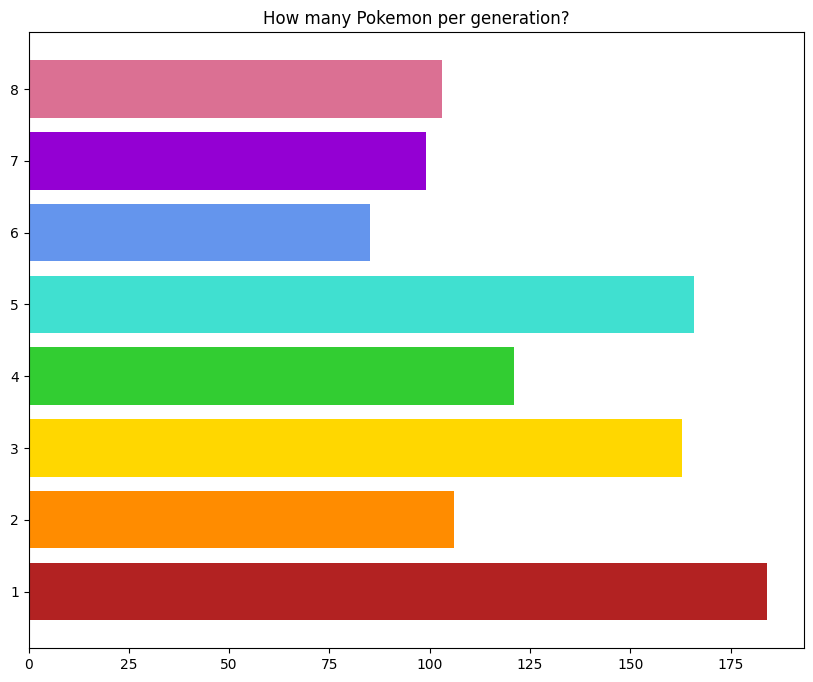

In [12]:
plt.figure(figsize = (10, 8))
plt.title('How many Pokemon per generation?');
# I use horizontal bars
plt.barh(pokemon_per_generation.index, pokemon_per_generation.values, color=['firebrick', 'turquoise', 'gold', 'limegreen', 'darkorange', 'palevioletred', 'darkviolet', 'cornflowerblue'])
plt.show()

## How many special Pokemon per generation?
I study how in each generation the different kind of Pokemon are distributed

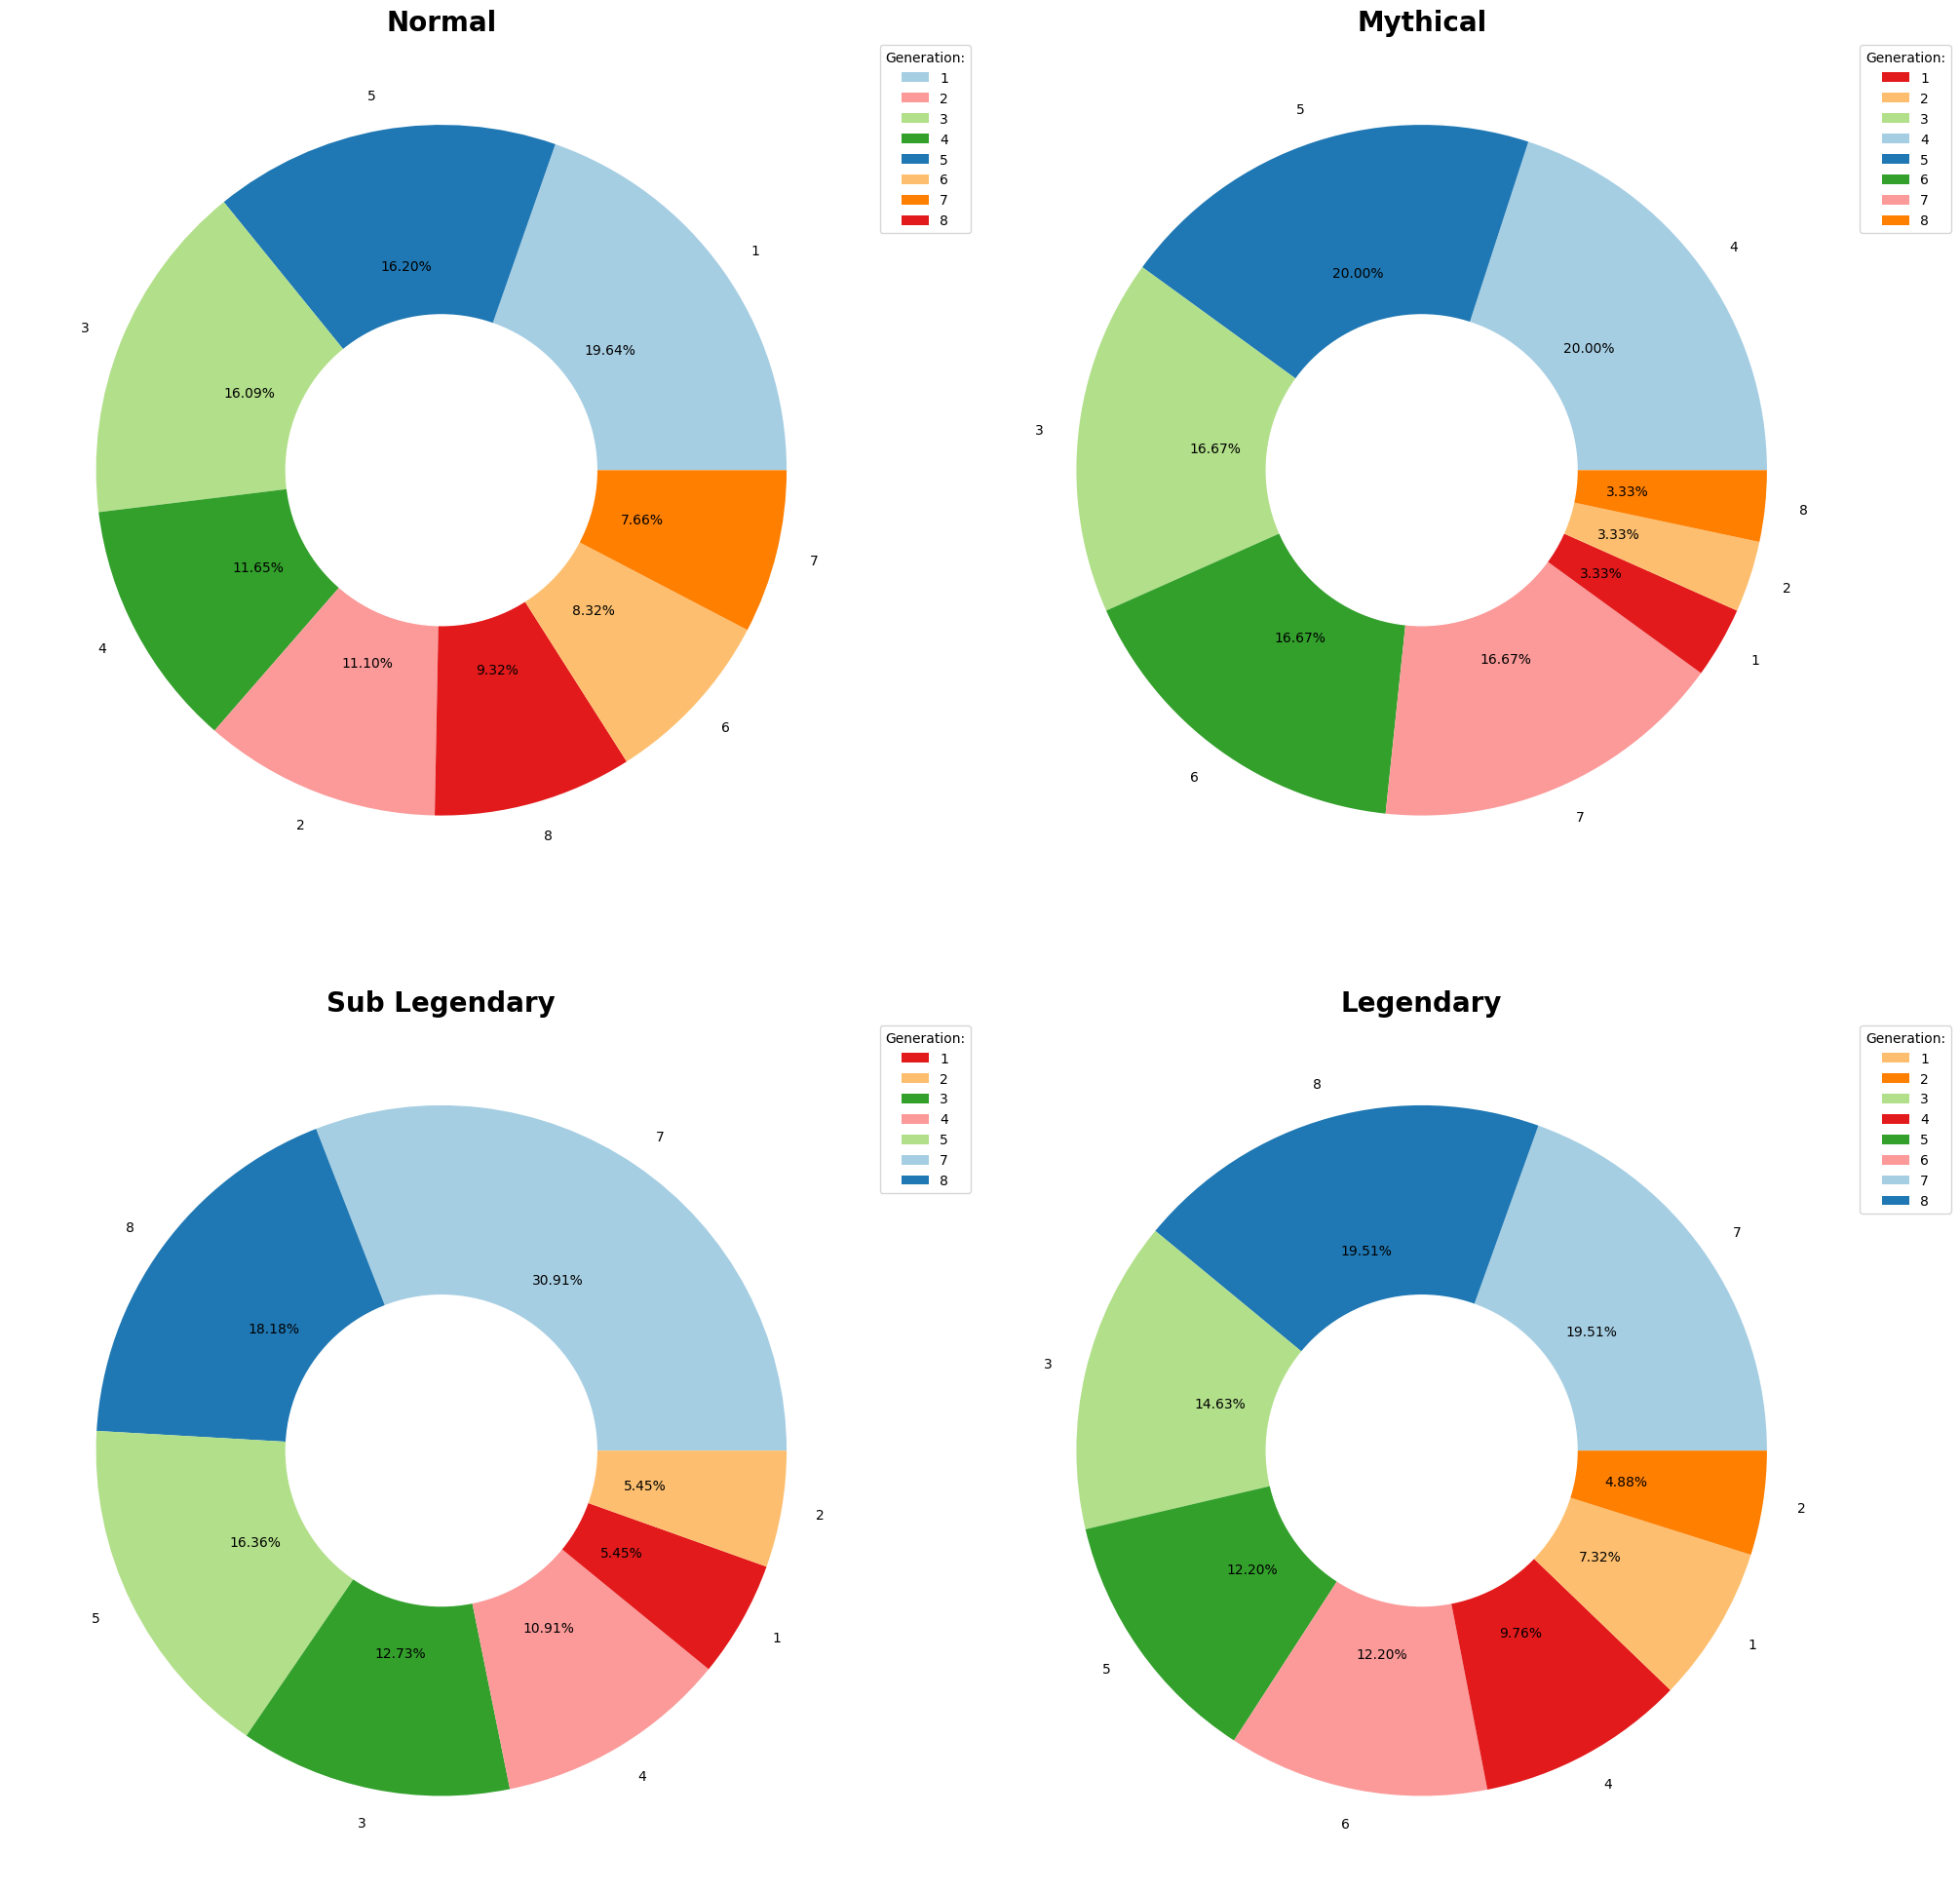

In [49]:
status_list = ['Normal', 'Mythical', 'Sub Legendary', 'Legendary']

fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 20), constrained_layout = True)
for i, ax in zip(range(len(status_list)), axs.flat):
  status_mask = pokemon_df[pokemon_df['status'] == status_list[i]]
  status_per_gen = status_mask['generation'].value_counts()
  donut_circle = plt.Circle( (0,0), 0.45, color = 'white')
  ax.pie(status_per_gen.values, labels = status_per_gen.index, autopct='%.2f%%', colors = sb.color_palette("Paired", len(status_per_gen.index)))
  ax.add_artist(donut_circle)
  handles, labels = ax.get_legend_handles_labels()
  handles, labels = zip(*[ (handles[i], labels[i]) for i in sorted(range(len(handles)), key=lambda k: list(map(int,labels))[k])] )
  ax.legend(handles, labels, title = 'Generation:', bbox_to_anchor=(1, 1))
  ax.set_title(status_list[i], fontsize = 20, fontweight='bold')
plt.show()    

## Type 1 frequency

In [22]:
type_1_frequency = pokemon_df['type_1'].value_counts()
type_1_frequency

Water       134
Normal      114
Grass        91
Bug          81
Psychic      78
Fire         65
Electric     60
Rock         60
Dark         44
Dragon       41
Fighting     41
Ghost        41
Poison       39
Ground       39
Steel        35
Ice          34
Fairy        22
Flying        8
Name: type_1, dtype: int64

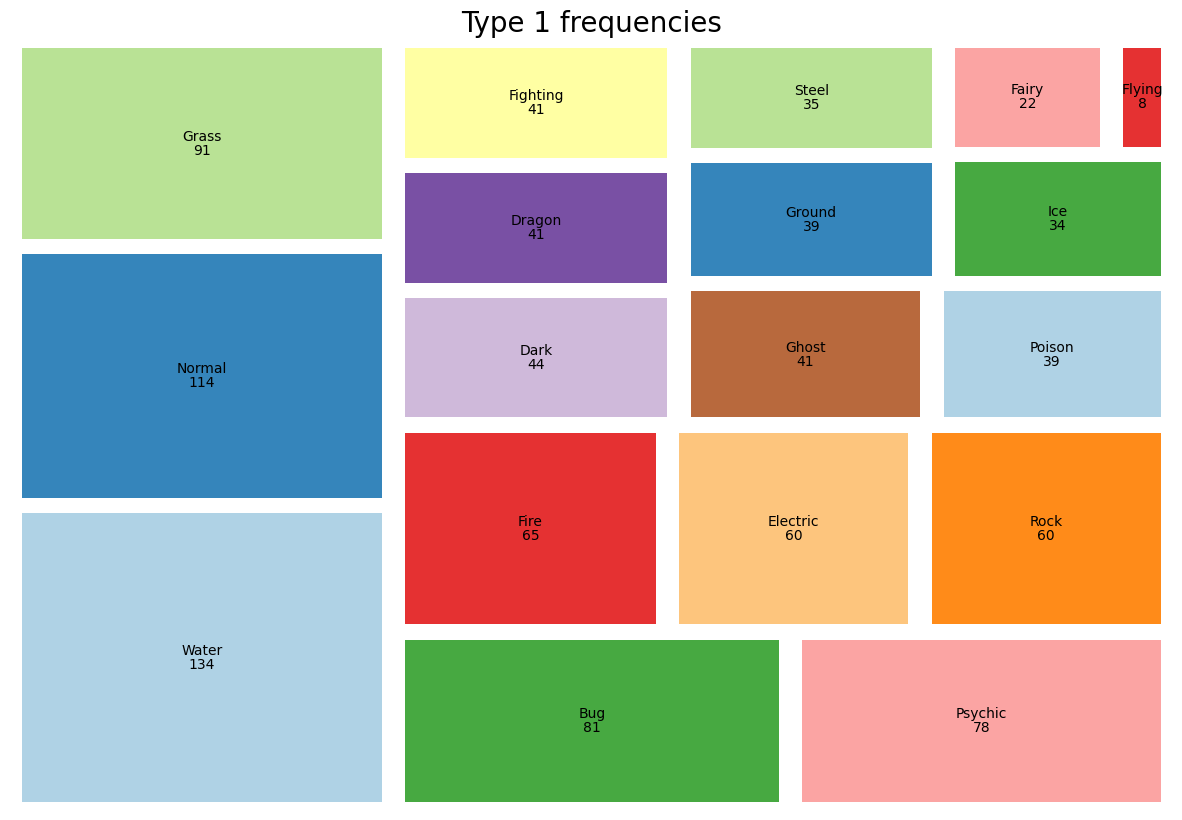

In [25]:
import squarify

plt.figure(figsize = (15, 10))
plt.title("Type 1 frequencies", fontdict = {'fontsize' : 20})
squarify.plot(sizes = type_1_frequency.values, label = type_1_frequency.index, value = type_1_frequency.values,
              alpha= 0.9, color=sb.color_palette("Paired"), pad=1)
# I don't want the axis
plt.axis('off')
plt.show()

## Type 2 frequency

In [15]:
type_2_present_mask = pokemon_df[pokemon_df['type_2'] != 'None']
type_list = type_2_present_mask['type_1'].value_counts().index

In [19]:
type_df_len = [(len(pokemon_df.index) - len(type_2_present_mask.index)), len(type_2_present_mask.index)]
name = ["Pokemon without a Type 2", "Pokemon with a Type 2"]
colors = ['#B7C3F3', '#8EB897']

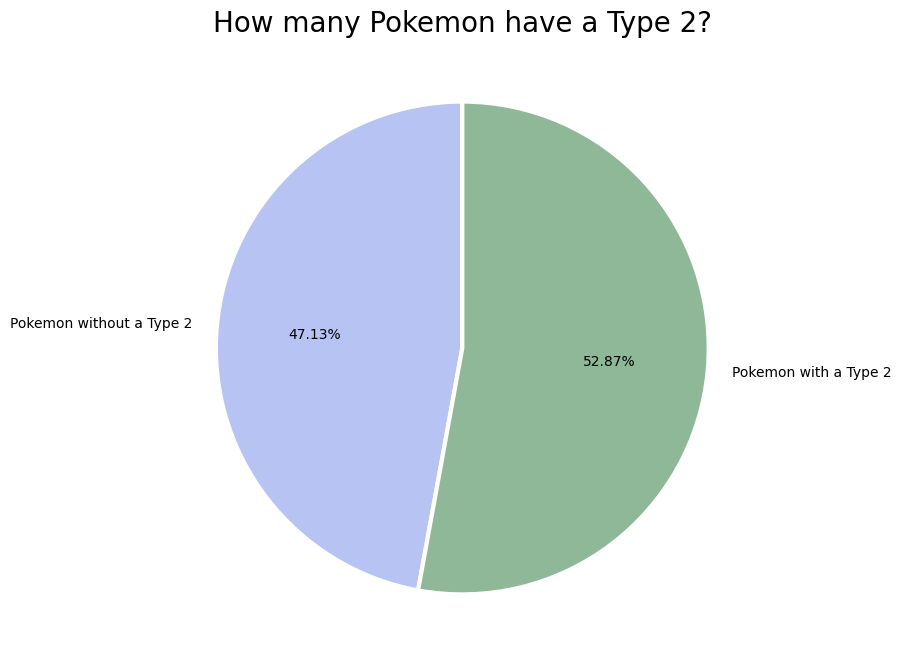

In [20]:
plt.figure(figsize=(10, 8))
plt.title("How many Pokemon have a Type 2?", fontdict = {'fontsize' : 20})
plt.pie(type_df_len, labels = name, autopct='%.2f%%', startangle=90, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, colors = colors)
plt.show()

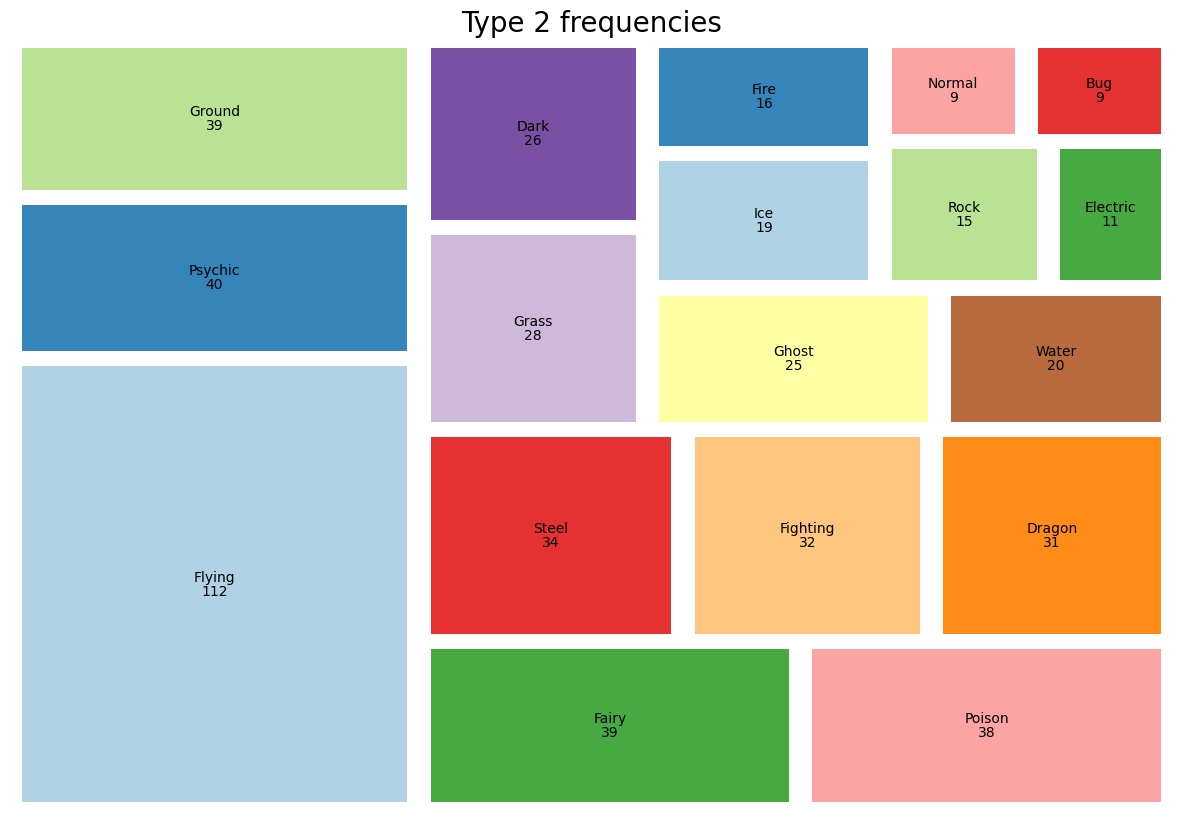

In [30]:
type_2_frequency = type_2_present_mask['type_2'].value_counts()

plt.figure(figsize = (15, 10))
plt.title("Type 2 frequencies", fontdict = {'fontsize' : 20})
squarify.plot(sizes = type_2_frequency.values, label = type_2_frequency.index, value = type_2_frequency.values,
              alpha = 0.9, color=sb.color_palette("Paired"), pad=1)
# I don't want the axis
plt.axis('off')
plt.show()

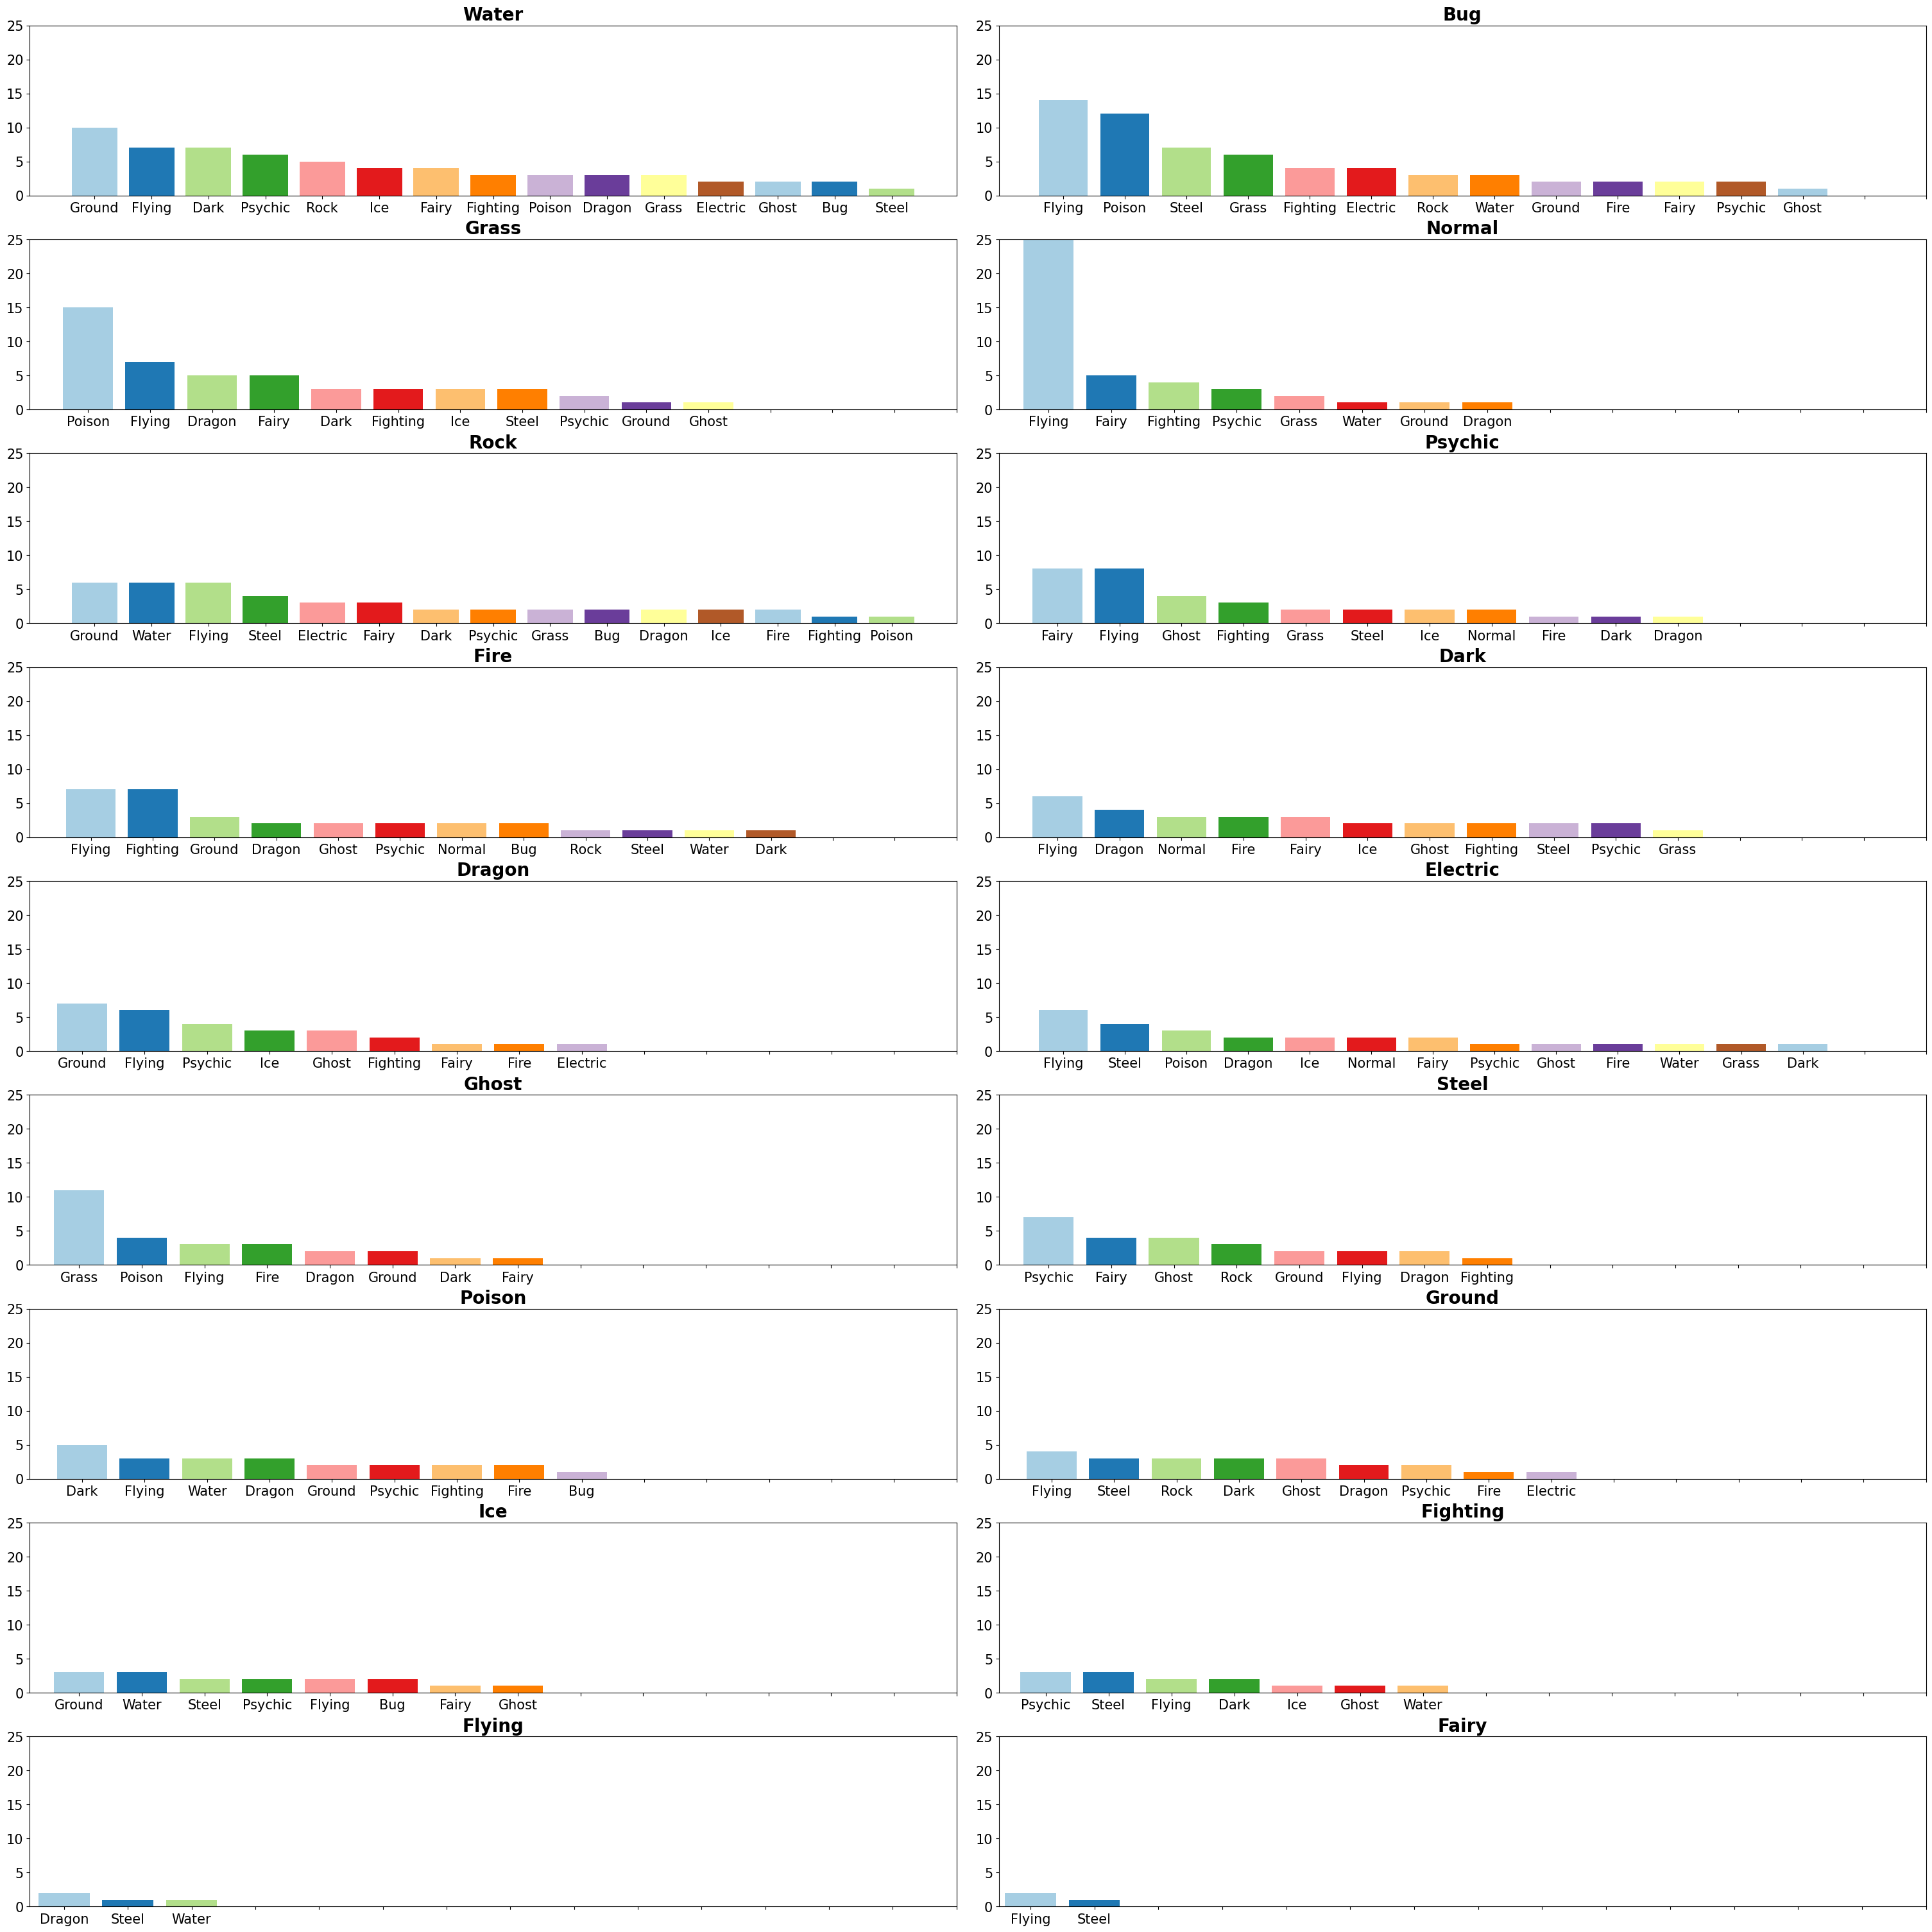

In [50]:
fig, axs = plt.subplots(nrows = 9, ncols = 2, figsize = (30, 30), constrained_layout = True)
for i, ax in zip(range(len(type_list)), axs.flat):
  type_1 = type_2_present_mask[type_2_present_mask['type_1'] == type_list[i]]
  type_2_frequency = type_1['type_2'].value_counts()
  ax.bar(type_2_frequency.index, type_2_frequency.values, label = type_list[i], color = sb.color_palette("Paired", len(type_2_frequency.index)))
  ax.set_ylim([0, 25])
  ax.set_xticks(range(15)) 
  ax.tick_params(axis = 'both', labelsize = 15)
  ax.set_title(type_list[i], fontsize = 20, fontweight='bold')
plt.show()

## Ability 1 frequency

In [23]:
abil_1_frequency = pokemon_df['ability_1'].value_counts()
abil_1_mask = abil_1_frequency[abil_1_frequency.values >= 10]

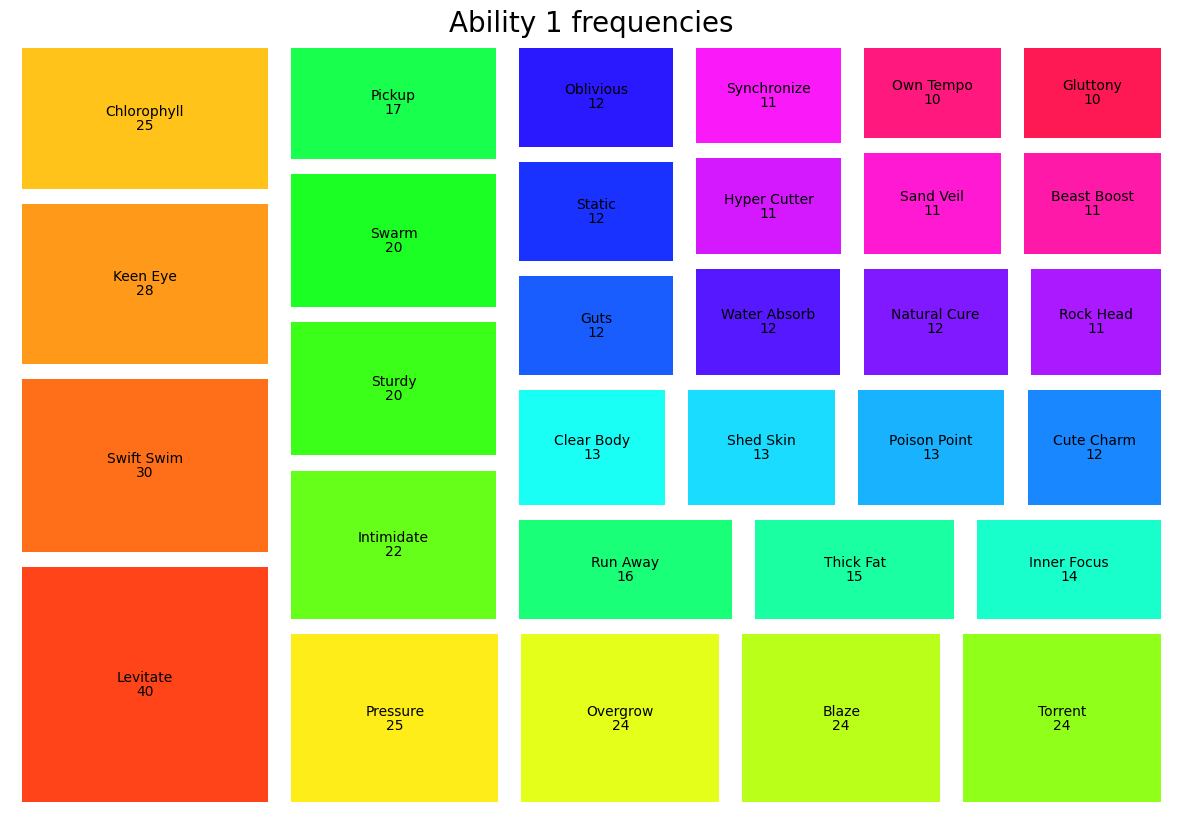

In [26]:
plt.figure(figsize = (15, 10))
plt.title("Ability 1 frequencies", fontdict = {'fontsize' : 20})
squarify.plot(sizes = abil_1_mask.values, label = abil_1_mask.index, value = abil_1_mask.values,
              alpha=0.9, color=sb.color_palette("hsv", len(abil_1_mask.index)), pad=1)
# I don't want the axis
plt.axis('off')
plt.show()

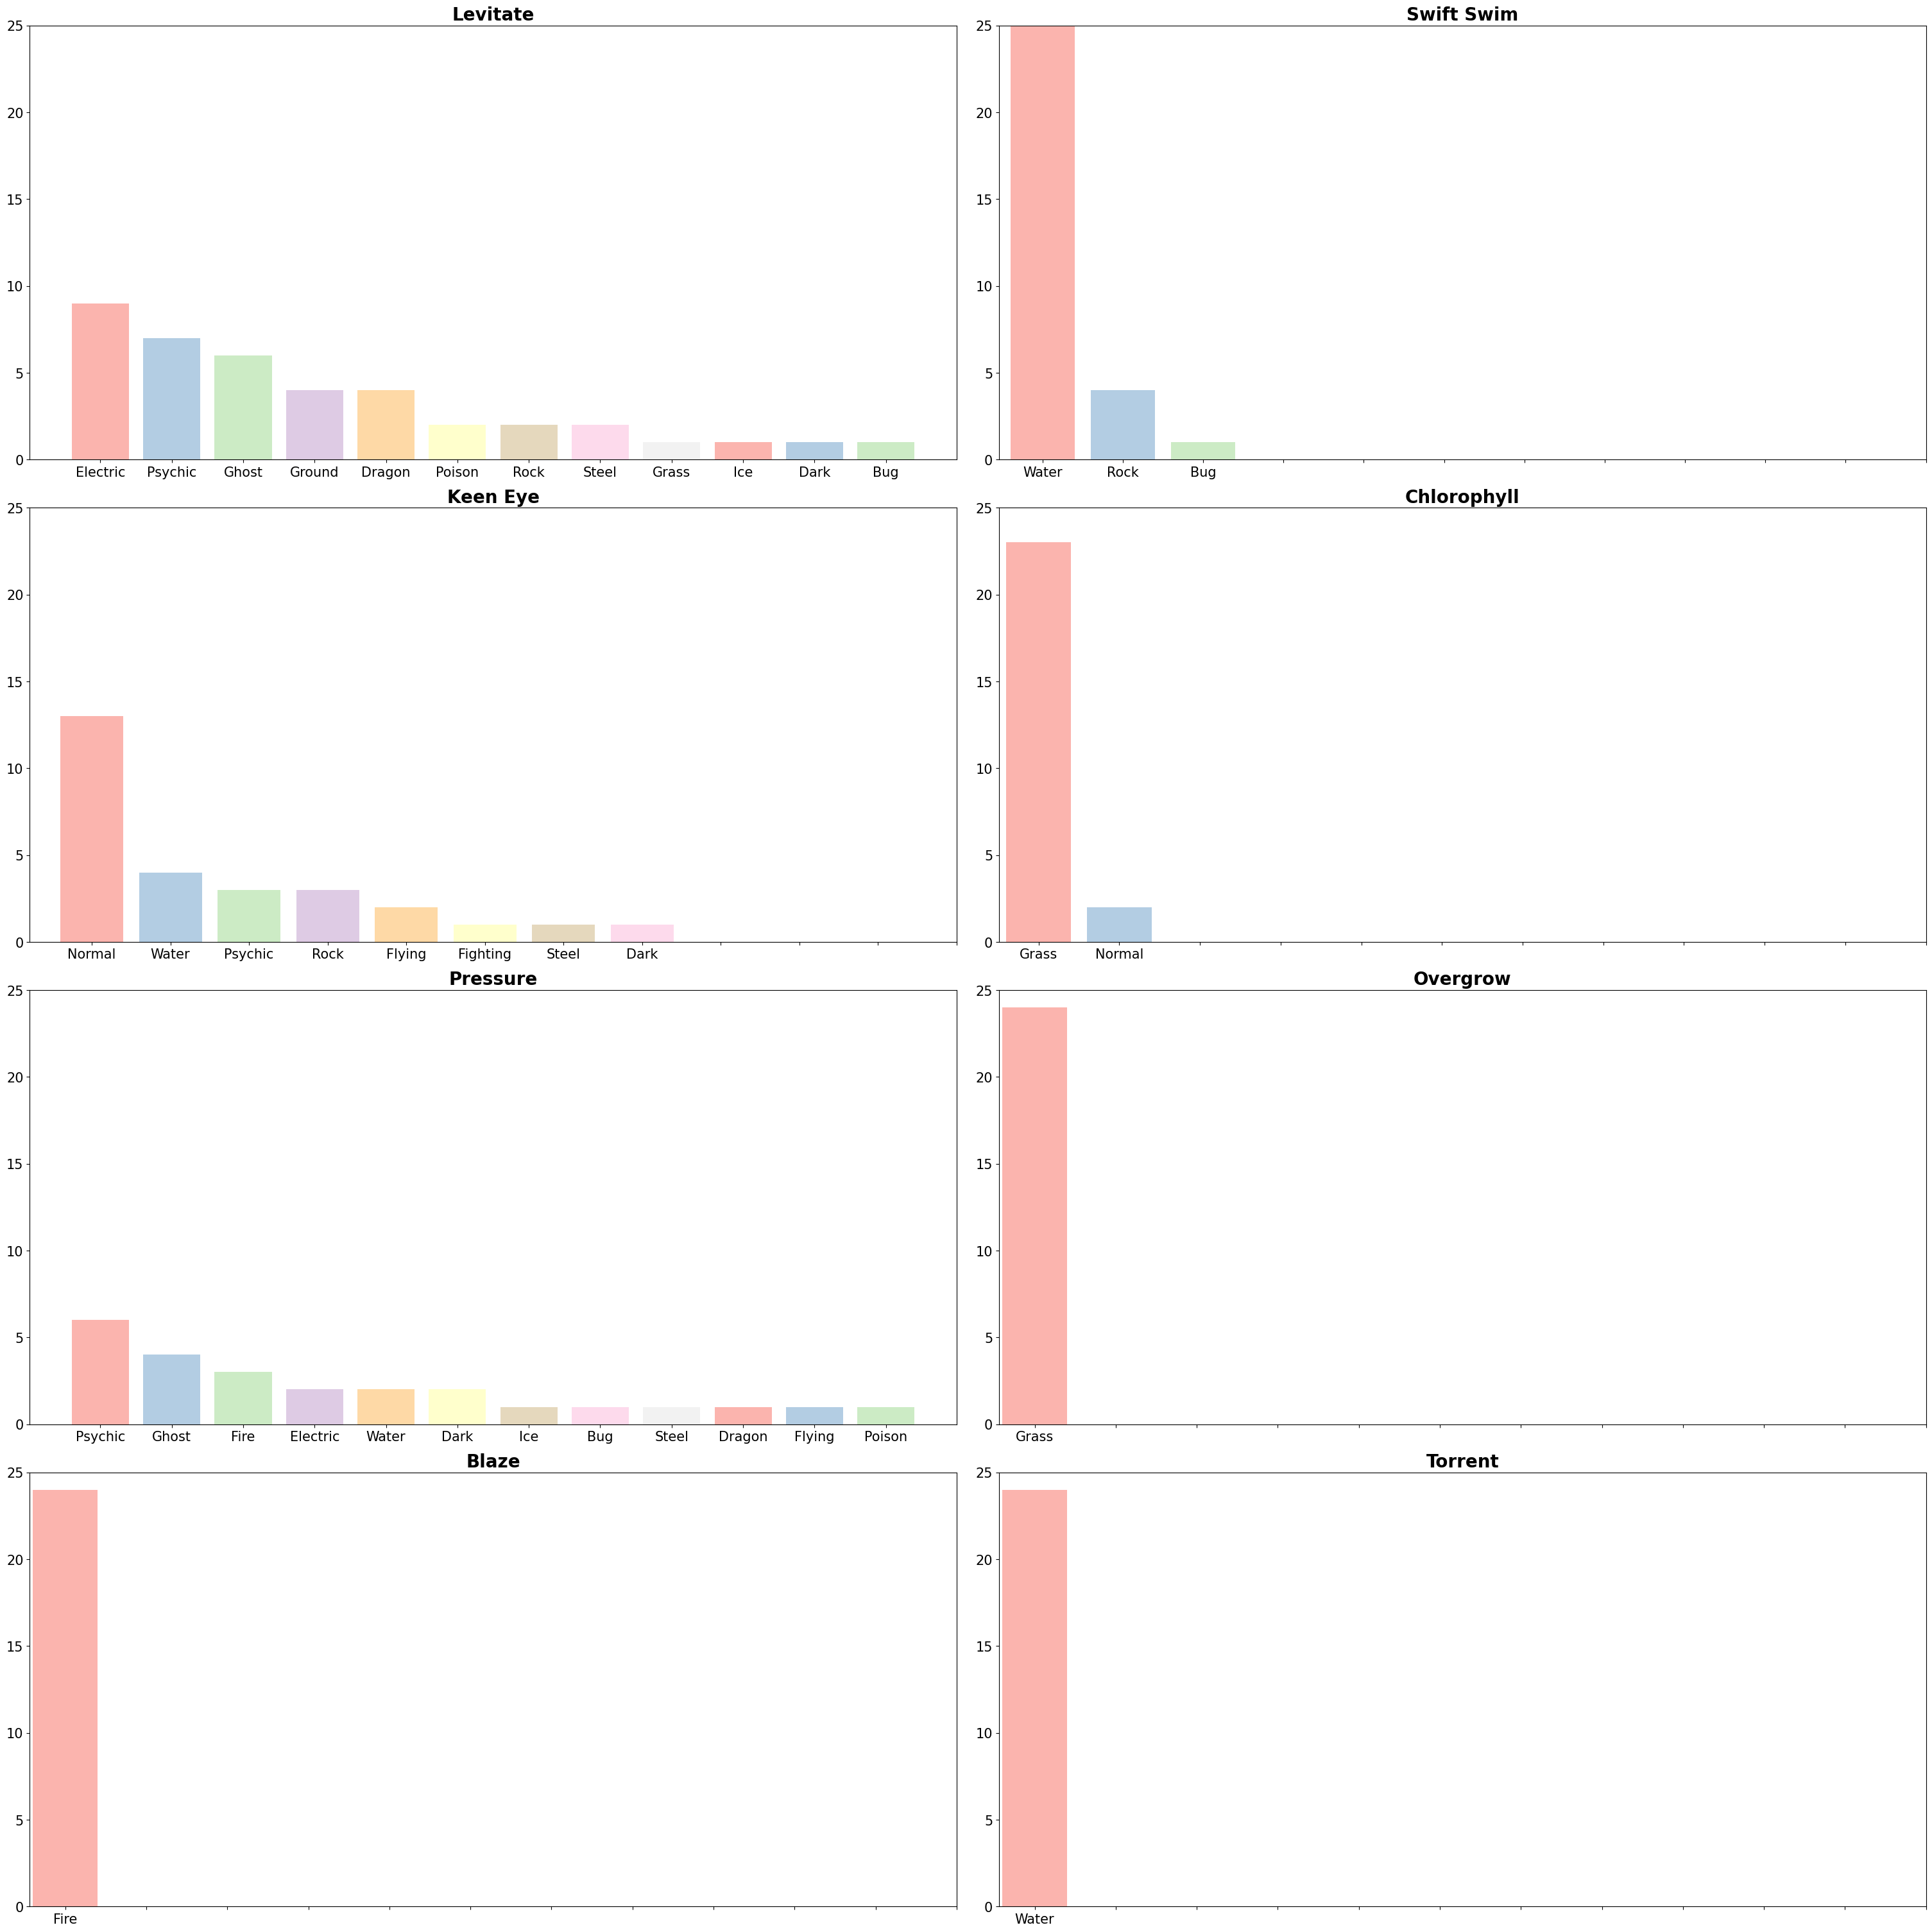

In [51]:
abil_1_list = pokemon_df['ability_1'].value_counts().index

fig, axs = plt.subplots(nrows = 4, ncols = 2, figsize = (30, 30), constrained_layout = True)
for i, ax in zip(range(len(type_list)), axs.flat):
  type_1 = pokemon_df[pokemon_df['ability_1'] == abil_1_list[i]]
  abil_1_frequency = type_1['type_1'].value_counts()
  ax.bar(abil_1_frequency.index, abil_1_frequency.values, label = abil_1_list[i], color = sb.color_palette("Pastel1", len(abil_1_frequency.index)))
  ax.tick_params(axis = 'both', labelsize = 15)
  ax.set_ylim([0, 25])
  ax.set_xticks(range(12))
  ax.set_title(abil_1_list[i], fontsize = 20, fontweight='bold')
plt.show()

## Ability 2 frequency

In [27]:
abil_2_present_mask = pokemon_df[pokemon_df['ability_2'] != 'None']
abil_2_frequency = abil_2_present_mask['ability_2'].value_counts()
abil_2_mask = abil_2_frequency[abil_2_frequency.values >= 10]

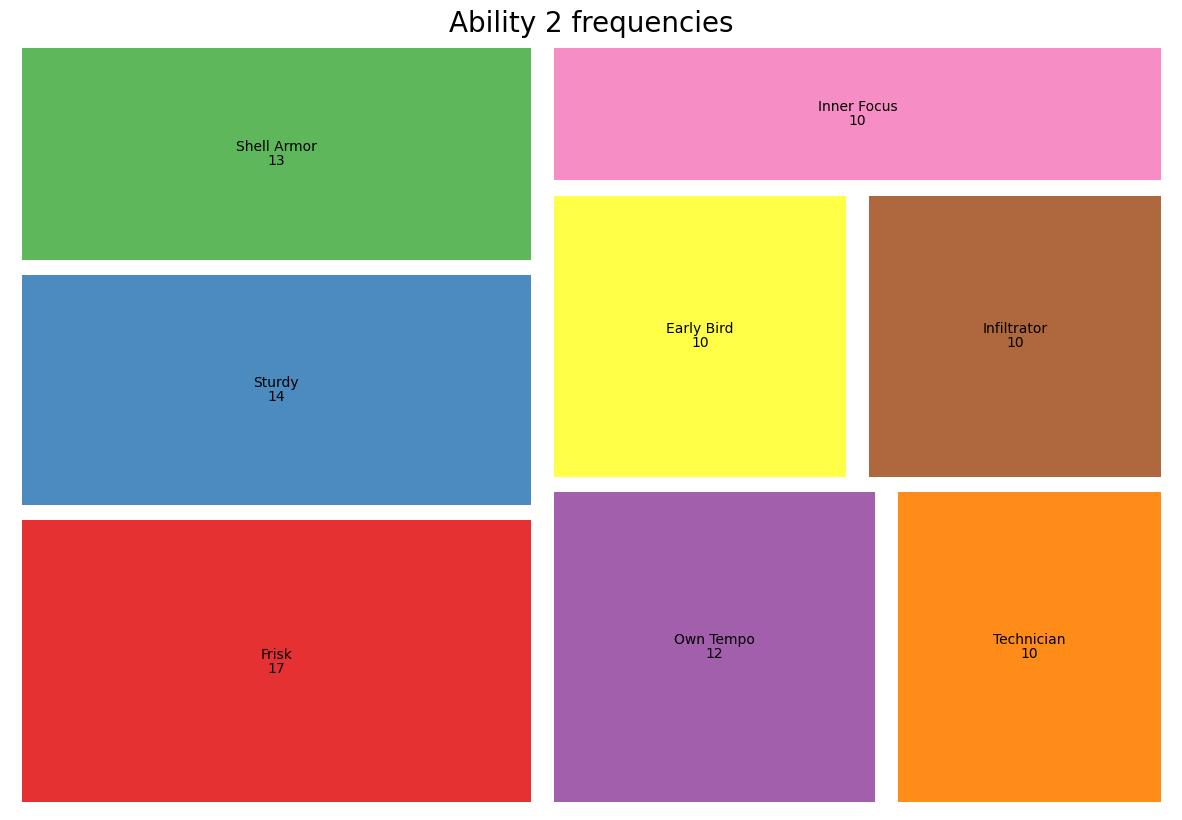

In [28]:
plt.figure(figsize = (15, 10))
plt.title("Ability 2 frequencies", fontdict = {'fontsize' : 20})
squarify.plot(sizes = abil_2_mask.values, label = abil_2_mask.index, value = abil_2_mask.values,
              alpha=0.9, color=sb.color_palette("Set1", len(abil_1_mask.index)), pad=1)
# I don't want the axis
plt.axis('off')
plt.show()

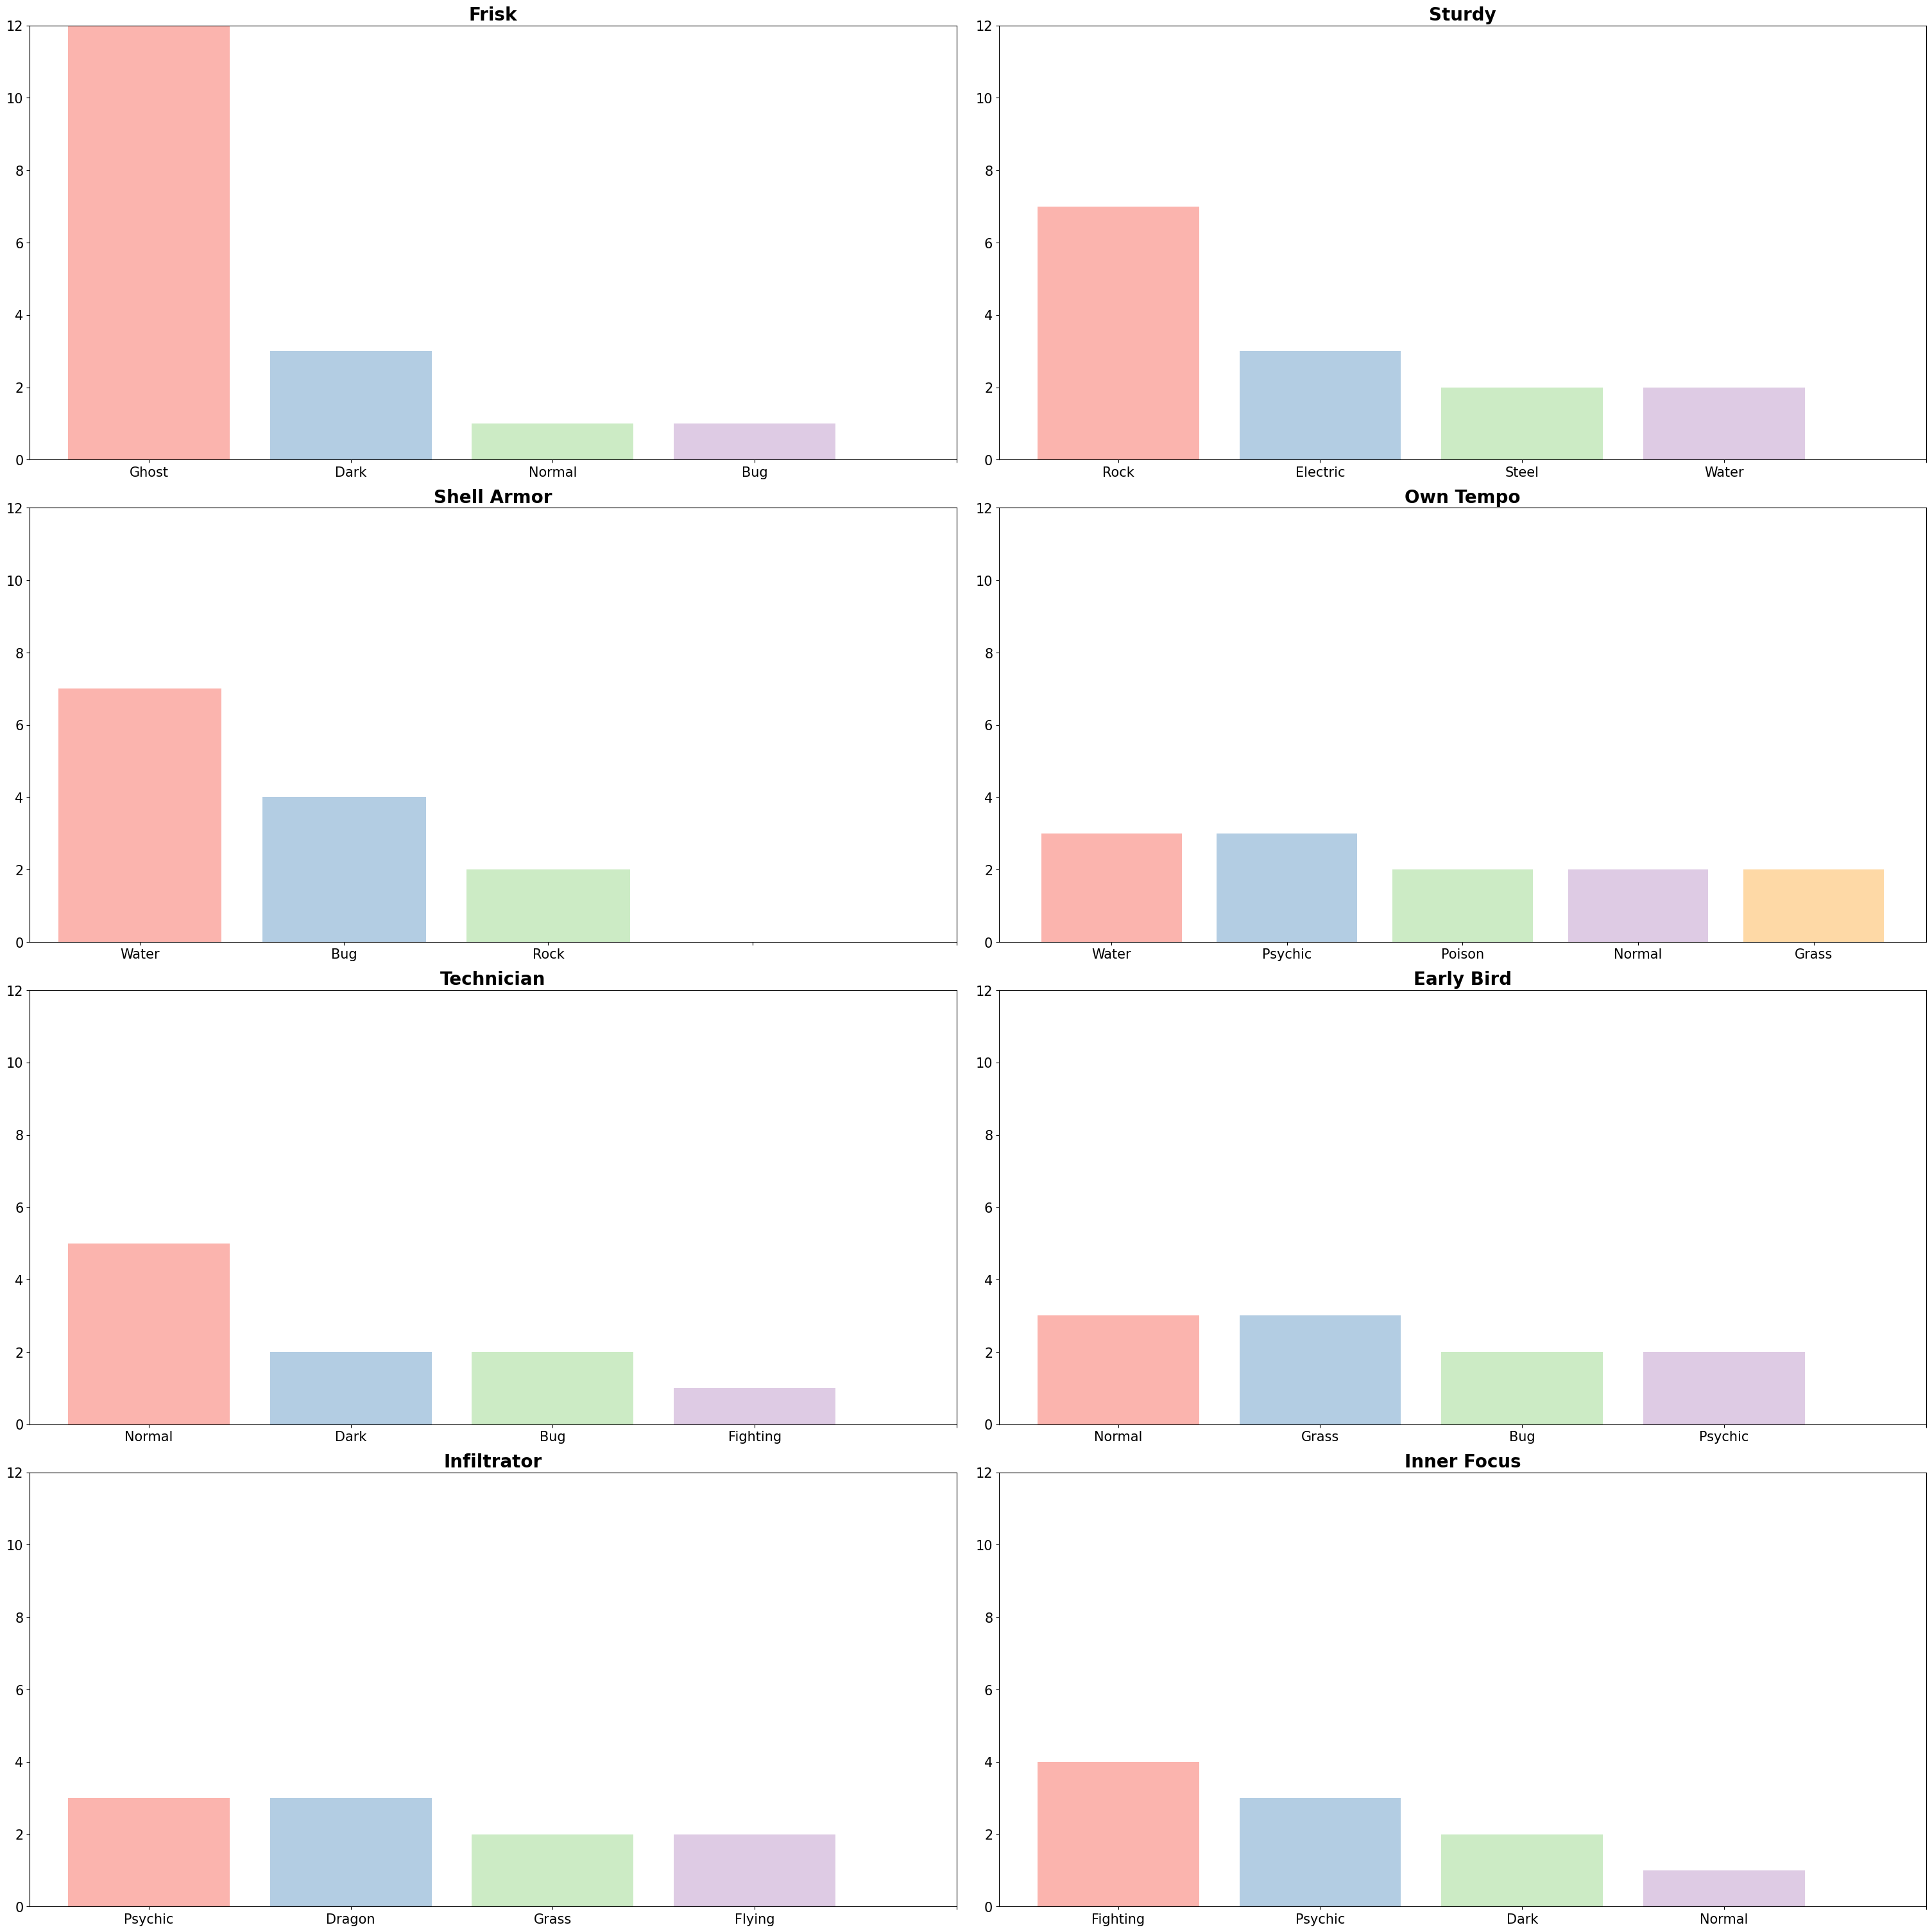

In [52]:
abil_list = abil_2_present_mask['ability_2'].value_counts().index

fig, axs = plt.subplots(nrows = 4, ncols = 2, figsize = (30, 30), constrained_layout = True)
for i, ax in zip(range(len(type_list)), axs.flat):
  type_1 = abil_2_present_mask[abil_2_present_mask['ability_2'] == abil_list[i]]
  abil_2_frequency = type_1['type_1'].value_counts()
  ax.bar(abil_2_frequency.index, abil_2_frequency.values, label = abil_list[i], color = sb.color_palette("Pastel1", len(abil_2_frequency.index)))
  ax.set_ylim([0, 12])
  ax.set_xticks(range(5))
  ax.tick_params(axis = 'both', labelsize = 15)
  ax.set_title(abil_list[i], fontsize = 20, fontweight='bold')
plt.show()